In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

In [2]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

In [4]:
X, y = mnist[:, 1:], mnist[:, 0]

In [40]:
in_encod = Input(shape=(784,))
x = Dense(400, activation="relu")(in_encod)
x = Dense(200, activation="relu")(x)
out = Dense(50, activation="relu")(x)

In [41]:
encoder = Model(in_encod, out)

In [42]:
in_decod = Input(shape=(50,))
x = Dense(200, activation="relu")(in_decod)
x = Dense(400, activation="relu")(x)
out = Dense(784, activation="sigmoid")(x)

In [43]:
decoder = Model(in_decod, out)

In [44]:
in_auto = Input(shape=(784,))
layer_encod = encoder(in_auto)
layer_decod = decoder(layer_encod)

In [45]:
autoencoder = Model(in_auto, layer_decod)

In [46]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 784)               0         
_________________________________________________________________
model_10 (Model)             (None, 50)                404250    
_________________________________________________________________
model_11 (Model)             (None, 784)               404984    
Total params: 809,234
Trainable params: 809,234
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_mod = X / 255

In [48]:
X_mod.dtype

dtype('float64')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_mod, y, test_size=0.33, random_state=42)

In [50]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [51]:
autoencoder.fit(X_train, X_train, batch_size=1000, epochs=50)

Epoch 1/50
13400/13400 [==============================] - 1s 82us/step - loss: 0.5010
Epoch 2/50
13400/13400 [==============================] - 1s 63us/step - loss: 0.2843
Epoch 3/50
13400/13400 [==============================] - 1s 63us/step - loss: 0.2626
Epoch 4/50
13400/13400 [==============================] - 1s 64us/step - loss: 0.2472
Epoch 5/50
13400/13400 [==============================] - 1s 78us/step - loss: 0.2234
Epoch 6/50
13400/13400 [==============================] - 1s 73us/step - loss: 0.2013
Epoch 7/50
13400/13400 [==============================] - ETA: 0s - loss: 0.183 - 1s 80us/step - loss: 0.1838
Epoch 8/50
13400/13400 [==============================] - 1s 71us/step - loss: 0.1721
Epoch 9/50
13400/13400 [==============================] - 1s 64us/step - loss: 0.1632
Epoch 10/50
13400/13400 [==============================] - 1s 74us/step - loss: 0.1548
Epoch 11/50
13400/13400 [==============================] - 1s 78us/step - loss: 0.1475
Epoch 12/50
13400/13400 [===

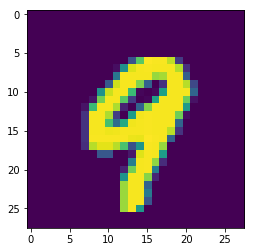

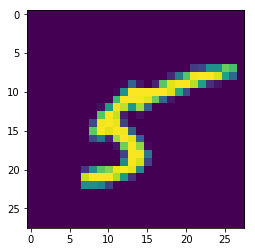

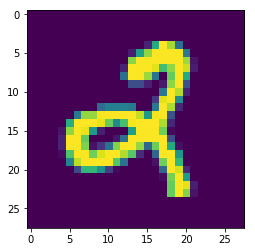

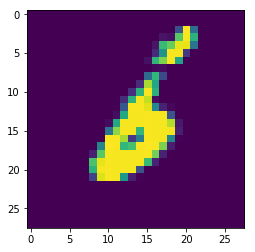

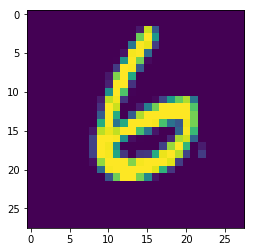

In [52]:
for img in X_test[:5]:
    plt.figure()
    plt.imshow(img.reshape(28, 28))

In [53]:
out = autoencoder.predict(X_test[:5])

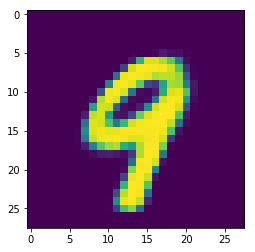

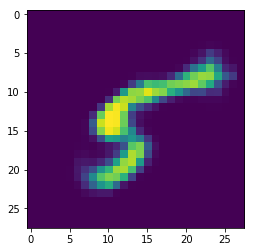

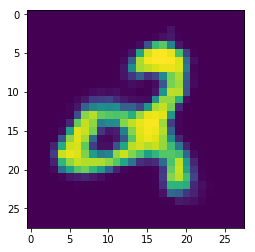

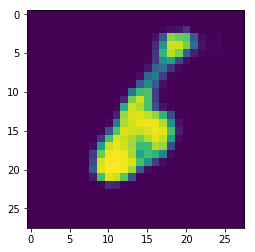

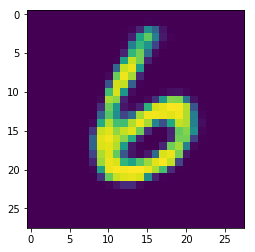

In [54]:
for img in out:
    plt.figure()
    plt.imshow(img.reshape(28, 28))

In [65]:
noise = np.random.randint(0, 1000, 50)

In [66]:
img = decoder.predict(np.array([noise]))

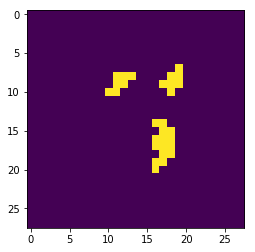

In [67]:
plt.imshow(img.reshape(28, 28))